# Working with Regression Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a continuous dependent variable is known as a **Regression Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Regression Tree model
+ How to visualize the structure of a Regression Tree
+ How to Prune a Regression Tree 

## 1. Collect the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
income = pd.read_csv('./data/income.csv')
income.head()

,Age,Education,Salary
0,25,Bachelors,43.9
1,30,Bachelors,54.4
2,45,Bachelors,62.5
3,55,Bachelors,72.5
4,65,Bachelors,74.6


## 2. Explore the Data

In [3]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        30 non-null     int64  
 1   Education  30 non-null     object 
 2   Salary     30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [4]:
income.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30.0,43.366667,14.375466,24.0,30.50,45.0,55.0,65.0
Salary,30.0,64.406667,26.202684,16.8,46.35,62.1,76.8,118.0


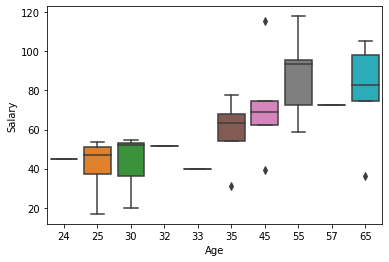

In [6]:
sns.boxplot(x='Age', y='Salary', data=income);

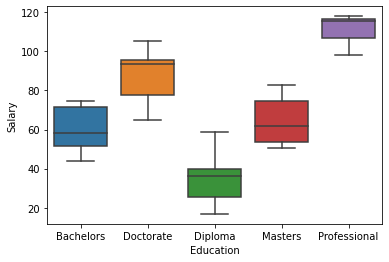

In [8]:
sns.boxplot(x='Education', y='Salary', data=income);

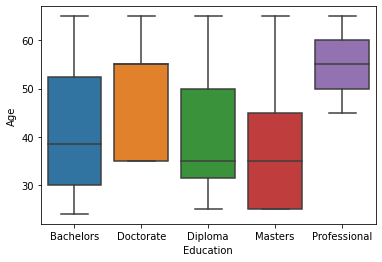

In [17]:
sns.boxplot(x='Education', y='Age', data=income);

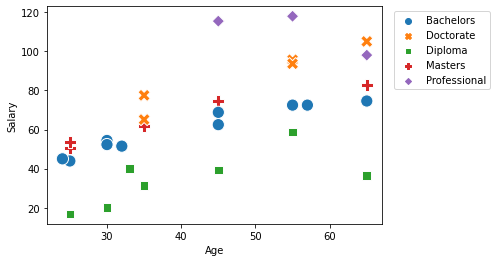

In [22]:
sns.scatterplot(data=income,
                x='Age', 
                y='Salary',
               hue='Education',
               style='Education',
               s=150);

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left');

## 3. Prepare the Data

In [23]:
# separate features and labels
X = income.drop('Salary', axis=1)
y = income['Salary']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.4,
                                                   stratify = X['Education'],
                                                   random_state=1234)

In [25]:
X_train.shape, X_test.shape

((18, 2), (12, 2))

### One Hot Encoding for Categorical Values

In [26]:
X_train.head()

,Age,Education
0,25,Bachelors
16,45,Masters
17,65,Masters
29,65,Professional
8,25,Diploma


In [29]:
X_train = pd.get_dummies(X_train)
X_train.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
0,25,1,0,0,0,0
16,45,0,0,0,1,0
17,65,0,0,0,1,0
29,65,0,0,0,0,1
8,25,0,1,0,0,0


In [32]:
X_test = pd.get_dummies(X_test)
X_test.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
9,30,0,1,0,0,0
21,25,0,0,0,1,0
4,65,1,0,0,0,0
10,35,0,1,0,0,0
7,65,0,0,1,0,0


## 4. Train and Evaluate the Regression Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=1234)

In [54]:
model = regressor.fit(X_train, y_train)

In [55]:
training_score = model.score(X_test, y_test)
training_score

0.5853149222529794

In [56]:
# get the predictions
y_pred = model.predict(X_test)

In [57]:
# Evaluate
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('MAE: ', mae)

MAE:  13.541666666666666


**Based on MAE value, we can expect the predicted value can be +- 13.54 thousands dollars off the acutal value.**

## 5. Visualize the Regression Tree

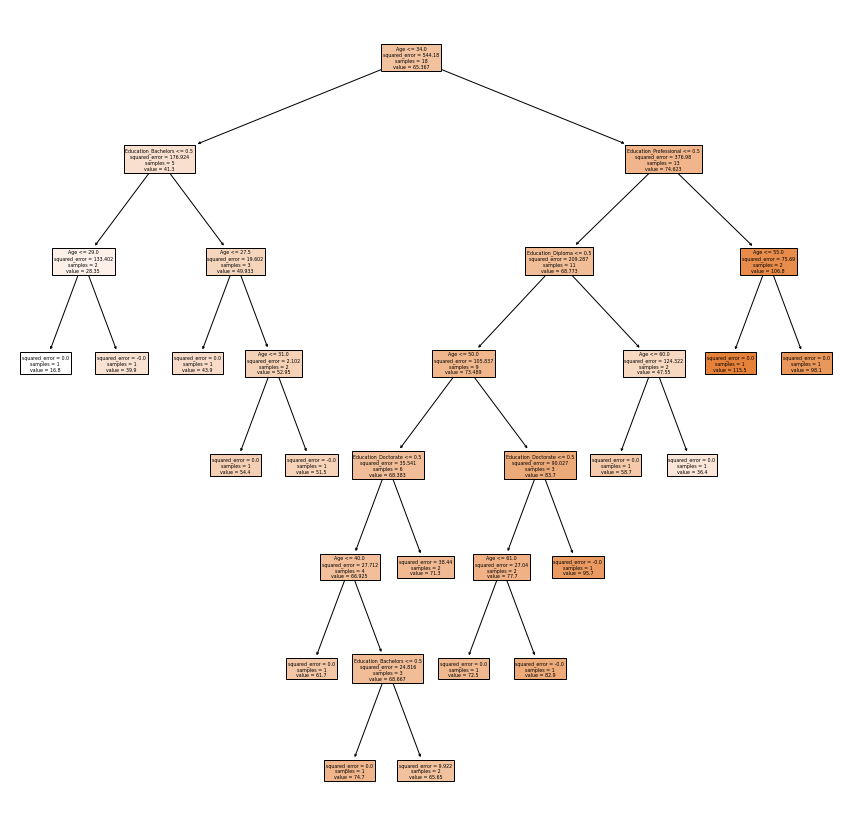

In [58]:
from sklearn import tree

feature_names = list(X_train.columns) 

plt.figure(figsize=(15,15))
tree.plot_tree(model,
              feature_names=feature_names,
              filled=True);

As the tree is pretty big, we can focus on speicifc nodes.

### Focusing on Specific Nodes in Visualization

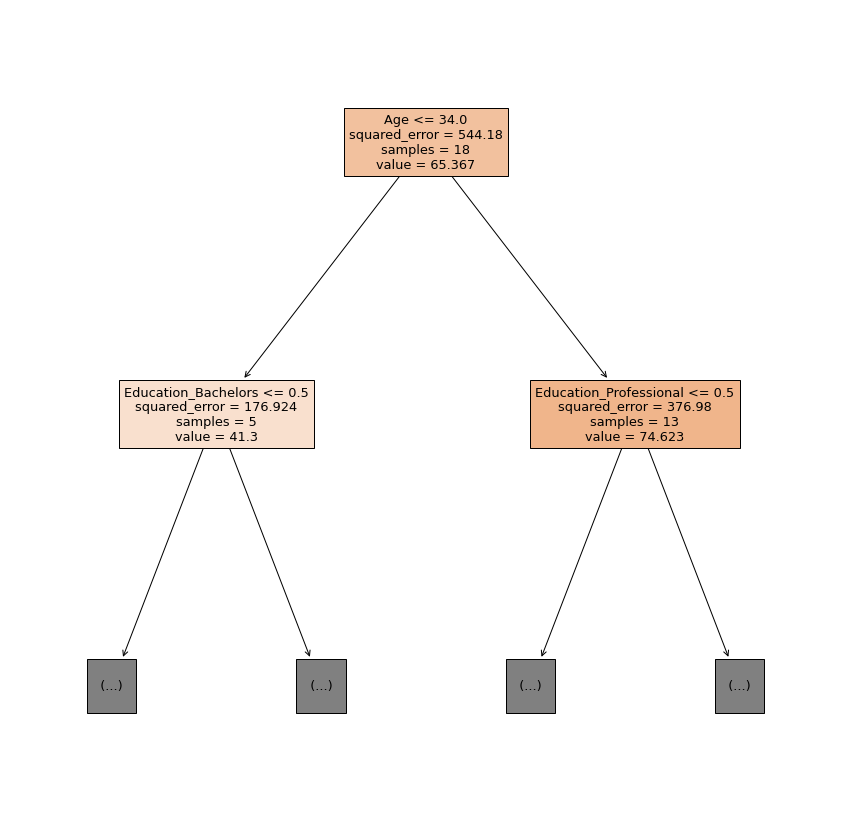

In [59]:
plt.figure(figsize=(15,15))
tree.plot_tree(model,
              feature_names=feature_names,
              filled=True,
              max_depth=1);

### Feature Importances

In [60]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X_train.columns)
feature_importance

Age                       0.545980
Education_Bachelors       0.063268
Education_Diploma         0.113521
Education_Doctorate       0.024903
Education_Masters         0.000000
Education_Professional    0.252327
dtype: float64

In [61]:
feature_importance.sort_values()

Education_Masters         0.000000
Education_Doctorate       0.024903
Education_Bachelors       0.063268
Education_Diploma         0.113521
Education_Professional    0.252327
Age                       0.545980
dtype: float64

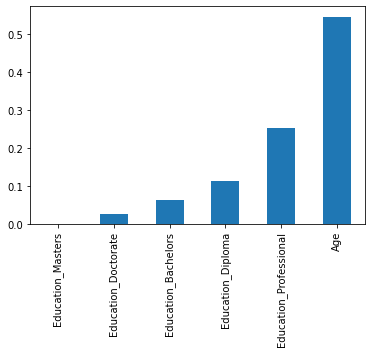

In [62]:
feature_importance.sort_values().plot(kind='bar');

## 6. Prune the Regression Tree

In [63]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print('Training Score: ', training_score)
print('Testing Score: ', testing_score)

Training Score:  0.9901253057607573
Testing Score:  0.5853149222529794


Our model is overfitted.

### Approach 2) Post Pruning Approach (Cost Complexity Pruning)

Let's get the list of effective alphas for the training data.

In [65]:
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
list(ccp_alphas)

[0.0,
 0.23361111111110705,
 2.1578395061724223,
 3.004444444444693,
 3.0334259259259144,
 8.409999999999753,
 12.000000000000506,
 13.813611111110644,
 14.822500000000016,
 26.06669753086468,
 31.05601851851865,
 61.1659960718292,
 135.95562548562512,
 222.77094017094078]

**We remove the maximum effective alpha because it is the trivial tree with just one node.**

The larger the alpha value, the smaller the tree will be. The highest alpha value means only one node. However we don't want that. So we will remove that maximum alpha value.

In [66]:
ccp_alphas = ccp_alphas[:-1]
list(ccp_alphas)

[0.0,
 0.23361111111110705,
 2.1578395061724223,
 3.004444444444693,
 3.0334259259259144,
 8.409999999999753,
 12.000000000000506,
 13.813611111110644,
 14.822500000000016,
 26.06669753086468,
 31.05601851851865,
 61.1659960718292,
 135.95562548562512]

#### Build Model using looping through Various Alphas values

In [74]:
train_scores, test_scores = [], []

for alpha in ccp_alphas:
    model = DecisionTreeRegressor(ccp_alpha=alpha, random_state=1234)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

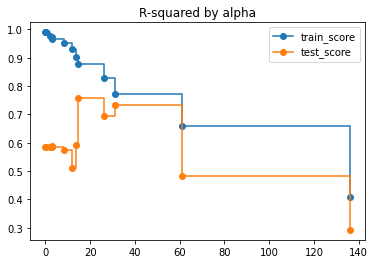

In [75]:
plt.plot(ccp_alphas,
        train_scores,
        marker='o',
        label='train_score',
        drawstyle='steps-post')

plt.plot(ccp_alphas,
        test_scores,
        marker='o',
        label='test_score',
        drawstyle='steps-post')

plt.legend()
plt.title('R-squared by alpha');

In [76]:
test_scores

[0.5853149222529794,
 0.5857107382012932,
 0.5857107382012932,
 0.5889110156116097,
 0.5861012049128272,
 0.5742699063850475,
 0.5110187660049715,
 0.5901546580161237,
 0.7572572323335666,
 0.6933555316243081,
 0.7328980549684876,
 0.4823659659054369,
 0.2920328593359385]

In [79]:
index_max_score = test_scores.index(max(test_scores)) # get the index of maximum test score
best_alpha = ccp_alphas[index_max_score] # get the alpha score based on that index
best_alpha # best alpha score

14.822500000000016

#### Build Final Model using Best Alpha

In [82]:
final_model = DecisionTreeRegressor(ccp_alpha=best_alpha, random_state=1234)
final_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=14.822500000000016, random_state=1234)

In [83]:
training_score = final_model.score(X_train, y_train)
testing_score = final_model.score(X_test, y_test)

print('Training Score: ', training_score)
print('Testing Score: ', testing_score)

Training Score:  0.8765762758237674
Testing Score:  0.7572572323335666


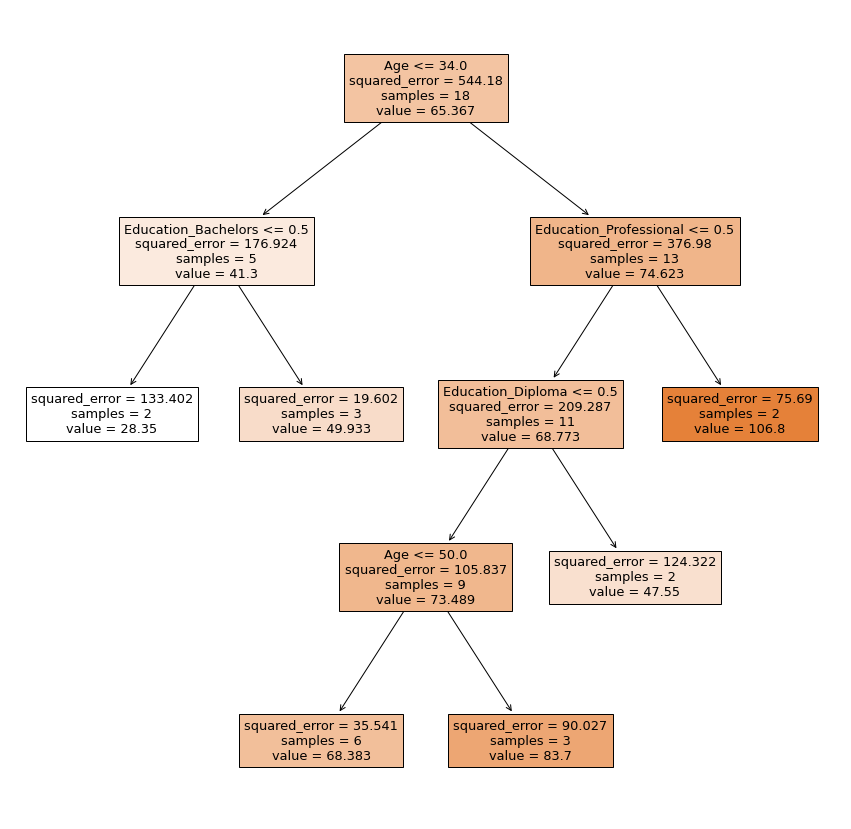

In [85]:
plt.figure(figsize = (15,15))
tree.plot_tree(final_model,
              feature_names = feature_names,
              filled=True);

### My Experiment Approach) Using Grid Search CV using the alphas values

In [92]:
from sklearn.model_selection import GridSearchCV

In [103]:
ccp_alphas

array([  0.        ,   0.23361111,   2.15783951,   3.00444444,
         3.03342593,   8.41      ,  12.        ,  13.81361111,
        14.8225    ,  26.06669753,  31.05601852,  61.16599607,
       135.95562549, 222.77094017])

In [94]:
parameters = {
    'ccp_alpha': ccp_alphas
}

In [106]:
dtr = DecisionTreeRegressor(random_state=1234)
gcv = GridSearchCV(dtr, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')

gcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1234),
             param_grid={'ccp_alpha': array([  0.        ,   0.23361111,   2.15783951,   3.00444444,
         3.03342593,   8.41      ,  12.        ,  13.81361111,
        14.8225    ,  26.06669753,  31.05601852,  61.16599607,
       135.95562549, 222.77094017])},
             scoring='neg_mean_squared_error')

In [107]:
gcv.best_params_

{'ccp_alpha': 8.409999999999753}

In [108]:
grid_model = gcv.best_estimator_

In [109]:
training_score = grid_model.score(X_train, y_train)
testing_score = grid_model.score(X_test, y_test)

print('Training Score: ', training_score)
print('Testing Score: ', testing_score)

Training Score:  0.9512503011666891
Testing Score:  0.5742699063850475
